# 决策树

## 训练和可视化

In [1]:
# 加载iris数据
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, 2:] # pedal length and width
y = iris.target

In [2]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [3]:
# 导出数到dot文件再通过命令行转成png文件
from sklearn.tree import export_graphviz 

export_graphviz(tree_clf,
                out_file="iris_tree.dot",
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names,
                rounded=True,
                filled=True)

执行命令`dot -Tpng iris_tree.dot -o iris_tree.png`生成图片

显示生成好的png图片

![title](iris_tree.png)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap) # 对y_pred里的值画等高线
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

<Figure size 800x400 with 1 Axes>

## 习题

### 7. 对   moons 数据集进行决策树训练并优化模型

1. 通过语句   make_moons(n_samples=10000, noise=0.4) 生成   moons 数据集

2. 通过   train_test_split() 将数据集分割为训练集和测试集。

3. 进行交叉验证,并使用网格搜索法寻找最好的超参数值(使用   GridSearchCV 类的帮助文档)

  提示: 尝试各种各样的   max_leaf_nodes 值

4.  使用这些超参数训练全部的训练集数据,并在测试集上测量模型的表现。你应该获得大约 85% 到 87% 的准确度。

In [5]:
# 准备数据
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        "max_leaf_nodes": list(range(2, 100)), 
        "min_samples_split": [2, 3, 4]
    }
]

grid_search_cv = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    n_jobs=-1,
    cv=3,
    verbose=2
)

grid_search_cv.fit(X_train, y_train)

tree_clf = grid_search_cv.best_estimator_
tree_clf

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 166 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    3.4s finished


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=17,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [7]:
from sklearn.metrics import accuracy_score

y_preds = tree_clf.predict(X_test)

accuracy_score(y_test, y_preds)

0.8695

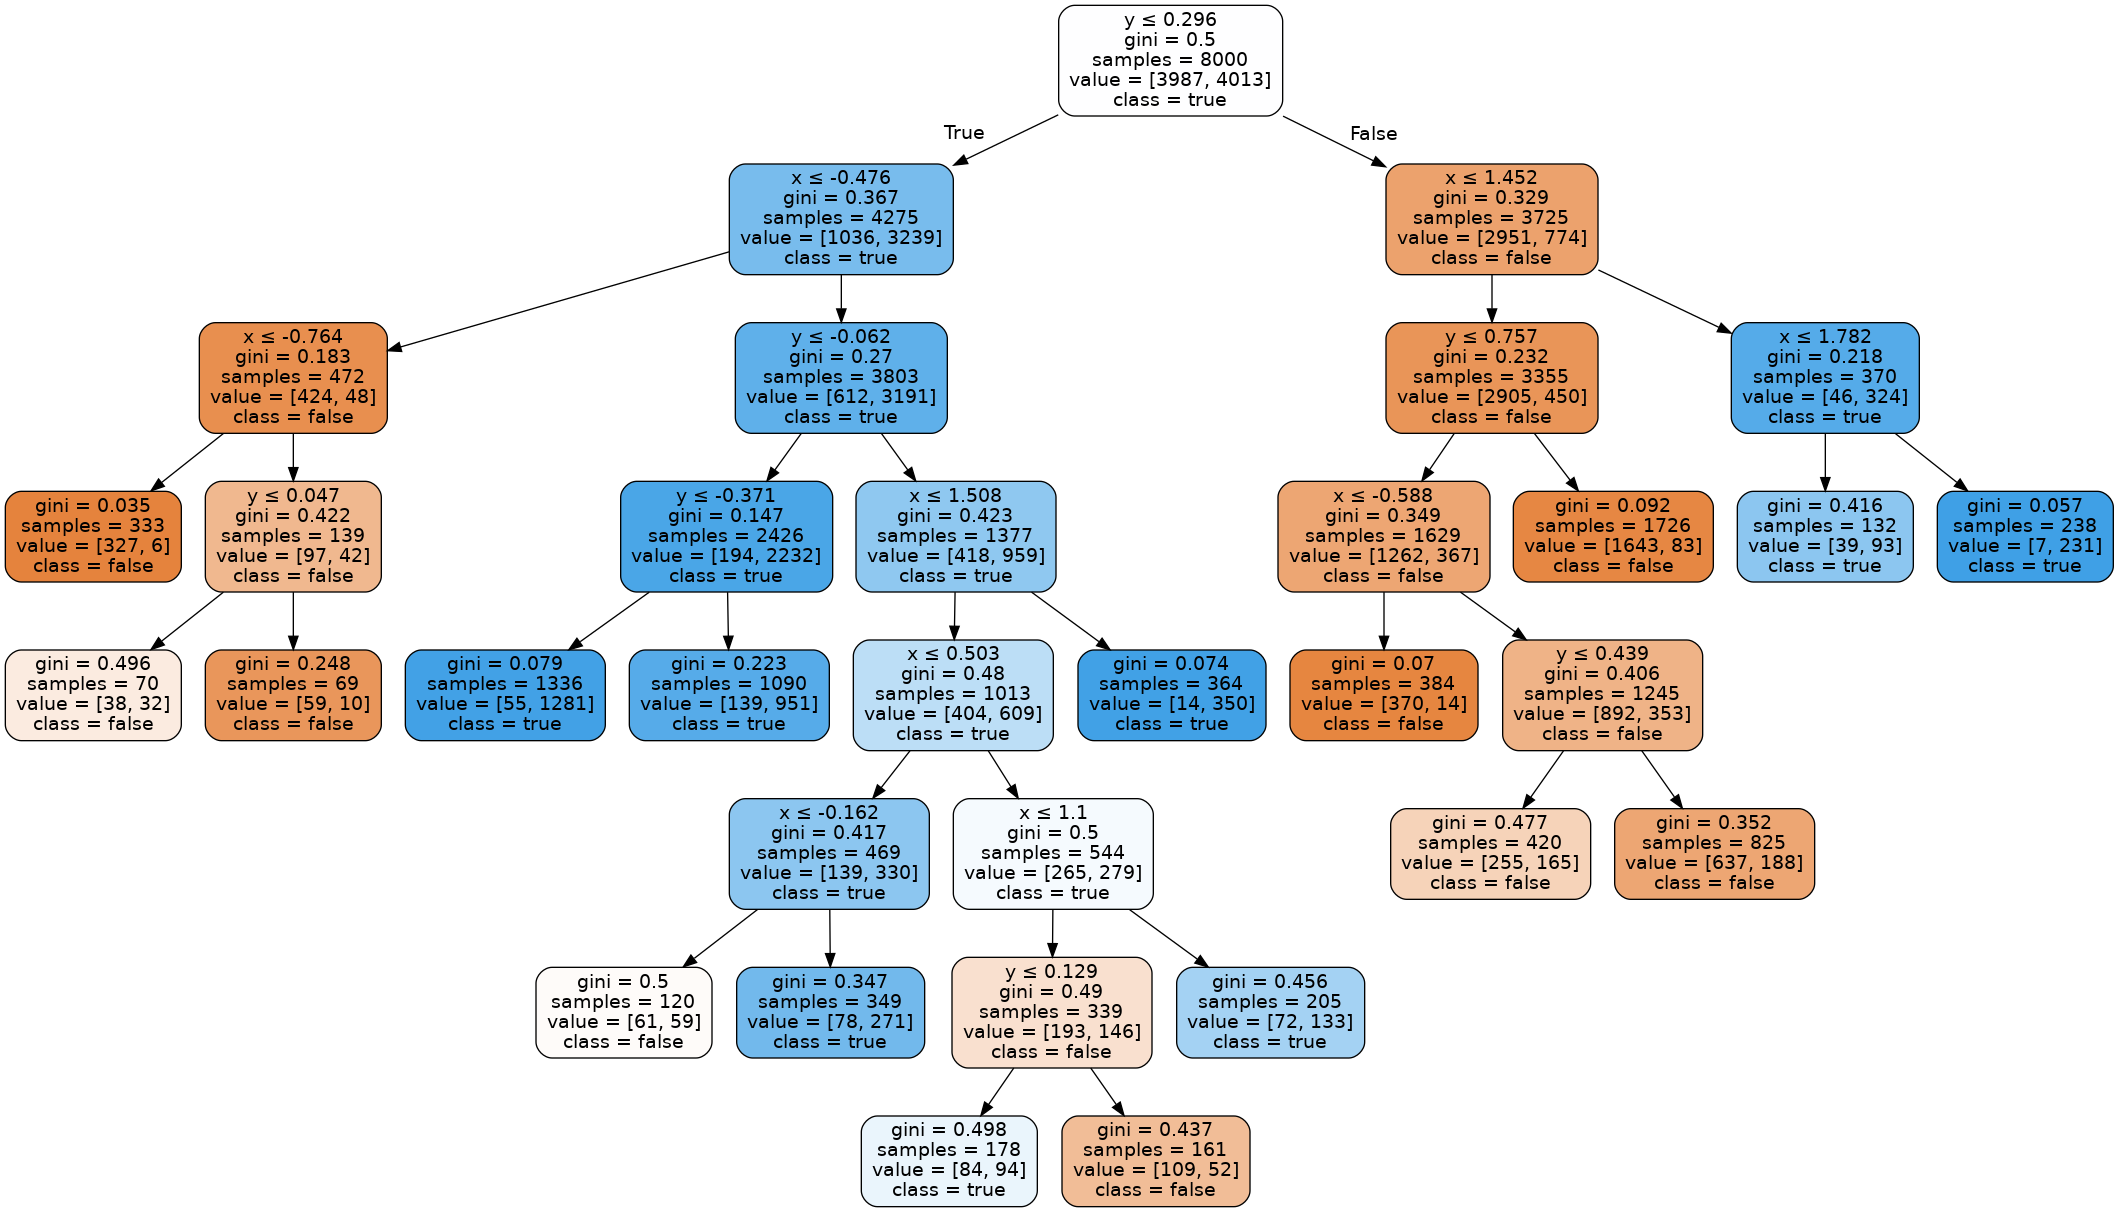

In [8]:
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz 

dot_data = export_graphviz(tree_clf, out_file=None, 
                         feature_names=["x","y"],  
                         class_names=["false","true"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

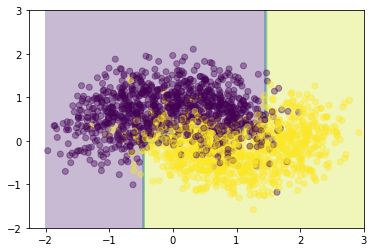

In [9]:
axes = [-2, 3, -2, 3]
x1s = np.linspace(axes[0], axes[1], 100)
x2s = np.linspace(axes[2], axes[3], 100)
x1, x2 = np.meshgrid(x1s, x2s)
X_all = np.c_[x1.ravel(), x2.ravel()]
y_preds = tree_clf.predict(X_all).reshape(x1.shape)

plt.contourf(x1, x2, y_preds, alpha=0.3)

# plt.plot(X_test[:, 0][y_test==0], X_test[:, 1][y_test==0], "rs")
# plt.plot(X_test[:, 0][y_test==1], X_test[:, 1][y_test==1], "bo")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.4)
plt.show()

### 8. 生成森林
1. 接着前边的练习 现在 让我们生成 1000 个训练集的子集 每个子集包含 100 个随机选择的实例. 

  提示: 你可以使用 Scikit-Learn 的ShuffleSplit 类. 

2.  使用上面找到的最佳超参数值 在每个子集上训练一个决策树. 在测试集上测试这1000 个决策树. 由于它们是在较小的集合上进行了训练 因此这些决策树可能会比第一个决策树效果更差, 只能达到约 80% 的准确度. 

3.  见证奇迹的时刻到了! 对于每个测试集实例 生成 1000 个决策树的预测结果 然后只保留出现次数最多的预测结果(您可以使用 SciPy 的 mode() 函数). 这个函数使你可以对测试集进行多数投票预测. 

4.  在测试集上评估这些预测结果 你应该获得了一个比第一个模型高一点的准确率 (大约 0.5% 到 1.5%) 

恭喜 你已经弄出了一个随机森林分类器模型! 

In [10]:
from sklearn.model_selection import ShuffleSplit

rs = ShuffleSplit(n_splits=1000, train_size=100, random_state=42) # 随机选择1000次, 训练集实例数100

tree_list = []
acc_list = []

for train_indics, test_indics in rs.split(X_train): # 从原始的大训练集中随机选择
    tree = DecisionTreeClassifier(max_leaf_nodes=17, min_samples_split=2, random_state=42)
    tree.fit(X[train_indics], y[train_indics])
    tree_list.append(tree)
    y_pred = tree.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc_list.append(accuracy)

print("mean accuracy score: ", np.mean(acc_list))

mean accuracy score:  0.807472


In [11]:
from scipy.stats import mode

Y_pred = np.empty([1000, len(X_test)], dtype=np.uint8) # 生成一个1000*测试集数量的全0矩阵

for tree_index, tree in enumerate(tree_list):
    Y_pred[tree_index] = tree.predict(X_test) # 填充每个决策树的测试集预测值

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0) 
# 针对0轴, 既纵列来统计, 取每个纵列上数量最大的值, 每个纵列对应的是测试集里的一个值在所有决策树上的预测结果, 取多数决策树预测出来的值

accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.877